<h1>Veri Bilimi Ödevi – Numpy ve Pandas Uygulamaları</h1>

<h2>1. Numpy Bölümü</h2>

In [5]:
import numpy as np

In [74]:
np.random.seed(42)
random_matrix = np.random.randint(0,100,25).reshape(5,5)
print("------Matris-----")
print(random_matrix)
print(f"---Ortalama: {random_matrix.mean()}")
print(f"---Standart s.: {random_matrix.std()}")
print(f"---Varyans: {random_matrix.var()}")
print(f"---En büyük değer: {random_matrix.max()}")
print(f"---En küçük değer: {random_matrix.min()}")
print(f"---Köşegen toplamı: {random_matrix.diagonal().sum()}")

------Matris-----
[[51 92 14 71 60]
 [20 82 86 74 74]
 [87 99 23  2 21]
 [52  1 87 29 37]
 [ 1 63 59 20 32]]
---Ortalama: 49.48
---Standart s.: 30.899993527507412
---Varyans: 954.8095999999999
---En büyük değer: 99
---En küçük değer: 1
---Köşegen toplamı: 217


In [19]:
np.random.seed(42)
student_points = np.random.normal(50,15,1000)
print(f"---Ortalama: {student_points.mean()}---")
print(f"---Standart s.: {student_points.std()}---")
print(f"---Medyan: {np.median(student_points)}---")
print(f"---50'den düşük: {np.sum(student_points<50)}---")

---Ortalama: 50.28998083733488---
---Standart s.: 14.680893116210314---
---Medyan: 50.379509183523325---
---50'den düşük: 490---


<h2>2.Pandas Bölümü</h2>

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv("C:/Users/berra/OneDrive/Masaüstü/veriler.csv",sep=';')
df

,Öğrenci,Yaş,Bölüm,Matematik,Fizik,Kimya
0,Ali,20,Bilgisayar,70,65,80
1,Ayşe,21,Fizik,60,75,85
2,Mehmet,19,Kimya,80,70,65
3,Zeynep,22,Bilgisayar,90,85,95
4,Ahmet,20,Fizik,55,60,70


In [43]:
print("-----Ortalama puanlar------")
print(df[["Matematik","Fizik","Kimya"]].mean())

-----Ortalama puanlar------
Matematik    71.0
Fizik        71.0
Kimya        79.0
dtype: float64


In [45]:
print("---En yüksek matematik notuna sahip öğrenci---")
print(df.loc[df["Matematik"].idxmax()])

---En yüksek matematik notuna sahip öğrenci---
Öğrenci          Zeynep
Yaş                  22
Bölüm        Bilgisayar
Matematik            90
Fizik                85
Kimya                95
Name: 3, dtype: object


In [47]:
df["Ortalama"] = df[["Matematik", "Fizik", "Kimya"]].mean(axis=1)
print("---Ortalamalı tablo---")
print(df)

---Ortalamalı tablo---
  Öğrenci  Yaş       Bölüm  Matematik  Fizik  Kimya   Ortalama
0     Ali   20  Bilgisayar         70     65     80  71.666667
1    Ayşe   21       Fizik         60     75     85  73.333333
2  Mehmet   19       Kimya         80     70     65  71.666667
3  Zeynep   22  Bilgisayar         90     85     95  90.000000
4   Ahmet   20       Fizik         55     60     70  61.666667


In [49]:
Bolumler = df.groupby("Bölüm")[["Matematik", "Fizik", "Kimya","Ortalama"]].mean()
print(Bolumler)

            Matematik  Fizik  Kimya   Ortalama
Bölüm                                         
Bilgisayar       80.0   75.0   87.5  80.833333
Fizik            57.5   67.5   77.5  67.500000
Kimya            80.0   70.0   65.0  71.666667


In [51]:
print("---Ortalaması 70 üzeri---")
print(df[df["Ortalama"]>70])

---Ortalaması 70 üzeri---
  Öğrenci  Yaş       Bölüm  Matematik  Fizik  Kimya   Ortalama
0     Ali   20  Bilgisayar         70     65     80  71.666667
1    Ayşe   21       Fizik         60     75     85  73.333333
2  Mehmet   19       Kimya         80     70     65  71.666667
3  Zeynep   22  Bilgisayar         90     85     95  90.000000


<h2>3. Ek Görev (Opsiyonel)</h2>

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df

,Öğrenci,Yaş,Bölüm,Matematik,Fizik,Kimya,Ortalama
0,Ali,20,Bilgisayar,70,65,80,71.666667
1,Ayşe,21,Fizik,60,75,85,73.333333
2,Mehmet,19,Kimya,80,70,65,71.666667
3,Zeynep,22,Bilgisayar,90,85,95,90.000000
4,Ahmet,20,Fizik,55,60,70,61.666667


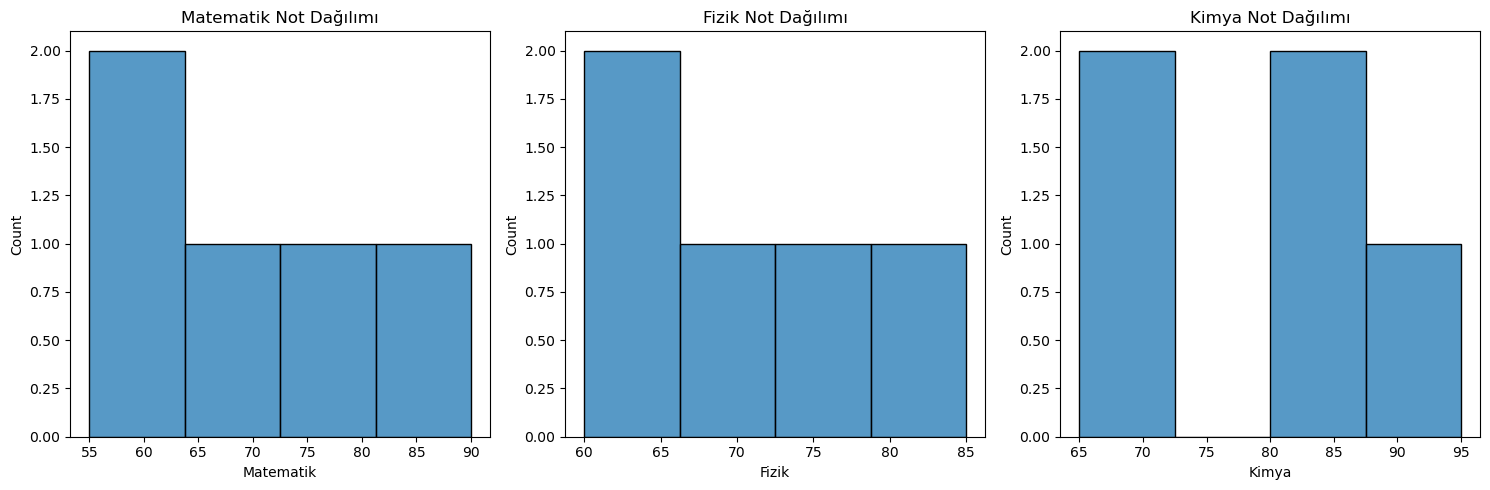

In [58]:
df_dersler = df[["Matematik", "Fizik", "Kimya"]]
plt.figure(figsize=(15, 5))
i = 1
for col in df_dersler.columns:
    plt.subplot(1, 3, i) 
    sns.histplot(data=df_dersler, x=col)
    plt.title(f"{col} Not Dağılımı")
    i += 1
plt.tight_layout()  
plt.show()

In [76]:
Bolumler = df.groupby("Bölüm")["Ortalama"].mean().reset_index()
print(Bolumler)

        Bölüm   Ortalama
0  Bilgisayar  80.833333
1       Fizik  67.500000
2       Kimya  71.666667


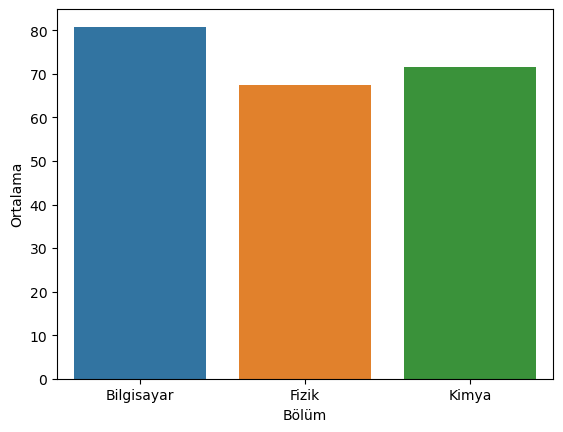

In [82]:
sns.barplot(data=Bolumler,x="Bölüm",y="Ortalama",hue="Bölüm")
plt.show()